<a href="https://colab.research.google.com/github/henriquesluizfernando/datascience/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## *Titanic*
 O Titanic foi construído para ser o maior, mais seguro e luxuoso navio. No dia 10 de abril de 1912, saiu do porto de Southampton, na Inglaterra, para sua viagem inaugural. No mesmo dia parou em Chesbourg, na França, e no dia seguinte. No dia seguinte, antes de partir para seu destino final, Nova York, fez mais uma parada em Queenstown, na Irlanda.

<center>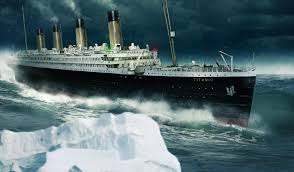</center>


Desde o dia 12 começou a receber alertar sobre gelo acumulado no caminho, mas mesmo assim seguiu para seu destino em alta velocidade. No dia 15, o Titanic colidiu em um iceberg e naufragou. Acredita-se que 2224 pessoas estavam abordo. O navio continha 20 barcos salva vida, a capacidade total dos barcos juntos era de 1186 pessoas. A ordem inicial era de que mulheres e crianças da primeira e segunda classe do navio teriam prioridade. O número de mortos foi 1513.

[Fonte](https://www.terra.com.br/noticias/mundo/titanic/)

 Nesse projeto, foram obtidos dados do [Kaggle](https://www.kaggle.com/) sobre o Titanic, e a proposta é, a partir desses dados, montar um modelo para descobrir quais pessoas morreram e quais ficaram vivas

## *Obtenção de dados*

Os dados foram obitdos na plataforma de competição do [Kaggle](https://www.kaggle.com/), na competição do Titanic.

Os dados são divididos em tres:

* `train.csv` - são os dados de treino, para alimentar o modelo de machine learning

* `test.csv` - dados que não são vistos pelo modelo de treino, que não informam se o passageiro sobreviveu ou nao

* `gender_submission.csv` - modelo de como as previsões devem ser enviadas para a plataforma


## *Análise exploratória*

Aqui faremos a análise dos daodos. Qual é o tamanho do dataset, quais são as variáveis presentes, a porcentagem de valores vazios, se há ou não outliers.

Antes disso tudo será feito um dicionário de variáveis, onde explicarei o que cada variável significa.

### *Dicionário de variáveis*

* PassengerId: Número de identificação do passageiro
* Survived: Informa se o passageiro sobreviveu ao desastre
  * 0 = Não
  * 1 = Sim
* Pclass: Classe do bilhete
  * 1 = 1ª Classe
  * 2 = 2ª Classe
  * 3 = 3ª Classe
*Name: Nome do passageiro
*Sex: Sexo do passageiro
*Age: Idade do passageiro
*SibSp: Quantidade de cônjuges e irmãos a bordo
*Parch: Quantidade de pais e filhos a bordo
*Ticket: Número da passagem
*Fare: Preço da Passagem
*Cabin: Número da cabine do passageiro
*Embarked: Porto no qual o passageiro embarcou
  * C = Cherbourg
  * Q = Queenstown
  * S = Southamp

### *Tamanho do dataset*

In [ ]:
# importar o conjunto de dados e ver as primeiras entradas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('https://raw.githubusercontent.com/luizfernandohenriques/datascience/master/datasets/traintitanic.csv')
test = pd.read_csv('https://raw.githubusercontent.com/luizfernandohenriques/datascience/master/datasets/testtitanic.csv')
train.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# tamanho

print(f'{train.shape[0]} entradas e {train.shape[1]} variáveis')

891 entradas e 12 variáveis


### *Variáves e tipos dos dados*

Agora vamos ver quais são as colunas do dataset e os tipos de dados de cada variável

In [ ]:
# nomes das colunas

train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
# tipos de dados

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### *Porcentagem de dados faltantes*

Podemos ver acima que a maioria das colunas tem 891 valores preenchidos, mas algumas, como 'Cabin' possuem só 204. Vamos ver essa porcentagem de dados que estão faltando

In [ ]:
((train.isnull().sum().sort_values(ascending=False)) / (train.shape[0])*100)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
Fare            0.000000
Ticket          0.000000
Parch           0.000000
SibSp           0.000000
Sex             0.000000
Name            0.000000
Pclass          0.000000
Survived        0.000000
PassengerId     0.000000
dtype: float64

A coluna 'Cabin' tem 77% dos seus dados não preenchidos, enquanto 'Age' tem quase 20% e 'Embarked' menos de 1%

### *Distruibuição estatística dos dados e outliers*

Aqui veremos as estatísticas dos dados e se há algum valor fora da curva, que altere muito a análise dos dados ou não.m

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


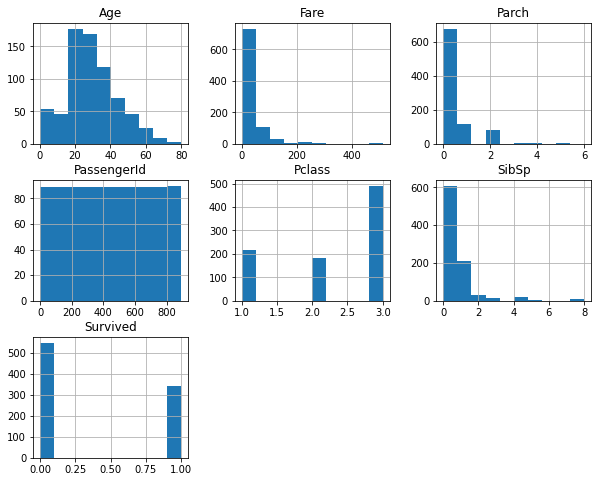

In [ ]:
train.hist(figsize=(10,8));

### *Que grupo de pessoas tinha mais chance de sobreviver?*

Vamos fazer algumas dessas análises através de gráficos. Qual sexo teve mais sobreviventes? Pessoas de que classe do navio tinham mais chance de sobreviver?

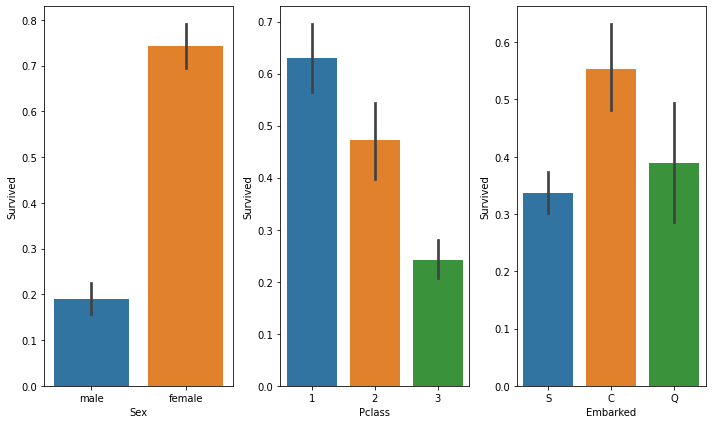

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10,6));
sns.barplot(x='Sex', y='Survived', data=train, ax=ax1);
sns.barplot(x='Pclass', y='Survived', data=train, ax=ax2);
sns.barplot(x='Embarked', y='Survived', data=train, ax=ax3);
plt.tight_layout()

Mulheres tinham mais chance de sobreviver em relação aos homens, quem estava na primeira classe também tinha mais chance em relação aos outros.

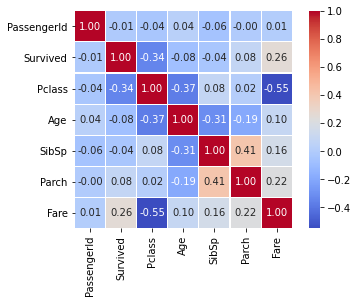

In [ ]:
sns.heatmap(train.corr(), cmap='coolwarm', fmt='.2f', linewidths=.1, vmax=1, square=True, linecolor='white', annot=True)

## *Preparação dos dados*

Nessa seção serão feitos os ajustes nos dados para que seja possível alimentar o modelo de machine learning.

Como vamos mexer com os dados, primeiramente vamos juntar os dados de treino e teste e um só dataframe e mais adiante iremos separá-los de novo.


In [ ]:
# salvar os índices dos datasets para depois separá-los de novo

train_idx = train.shape[0]
test_idx = test.shape[0]

# salvar PassengerId para submeter ao Kaggle

passenger_id = test['PassengerId']

# extrair coluna alvo 'Survived' na variável y e depois tirá-la dos dados de treino

target = train.Survived
train.drop(['Survived'], axis=1, inplace=True)

# juntar treino e teste em um dataset

df_merged = pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

print(f'{df_merged.shape}')

(1309, 11)


### *Selecionando colunas*

Algumas colunas, a primeira impressão, não possuem valor para o modelo, então serão retiradas

In [ ]:
df_merged.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

### *Valores faltantes*

Como visto anteriormente, algumas colunas possuem valores faltantes. Existem alguns modos de lidar com esse problema, como por exemplo excluir a coluna ou a linha, ou preencher com a média ou mediana. Aqui serão analisados esses valores e como serão preenchidos

In [ ]:
df_merged.isnull().sum()

Pclass        0
Sex           0
Age         263
SibSp         0
Parch         0
Fare          1
Embarked      2
dtype: int64

In [ ]:
# pegando a mediana da coluna 'Age'

age_median = df_merged['Age'].median()

# preenchendo o valor da mediana nas linhas com valor faltante

df_merged['Age'].fillna(age_median, inplace=True)

In [ ]:
# pegando a mediana da coluna 'Fare'

fare_median = df_merged['Fare'].median()

# preenchendo o valor vazio com a mediana

df_merged['Fare'].fillna(fare_median, inplace=True)

In [ ]:
# pegando o valor que mais se repete na variável 'Embarked'

embarked_top = df_merged['Embarked'].value_counts()[0]

# preenchendo os valores vazios com o valor que mais se repete

df_merged['Embarked'].fillna(embarked_top, inplace=True)

Para as variáveis 'Age' e 'Fare' o critério usado para o preenchimento de valores vazios foi a mediana de cada coluna. Já para a variável 'Embarked' o critério foi preencher com o valor mais frequente da coluna.

Vamos conferir para ver se todos os valores foram preenchidos.

In [ ]:
df_merged.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### *Preparando variáveis para o modelo*

Para preencher o modelo é necessário que as variáveis sejam transformadas em números. 'Sex' e 'Embarked' não são números. Para a variável 'Sex' o sexo masculino vai valer 0 e o feminino 1. Já para 'Embarked' serão usadas variáveis dummies, onde, onde cada porto é desmembrado em uma coluna e a coluna em que está o porto onde o passageiro embarcou recebe o valor 1, as outras recebem o valor 0.

In [ ]:
# colocando a variável 'Sex' em números

df_merged['Sex'] = df_merged['Sex'].map({'male':0, 'female':1})

# variáveis dummies para 'Embarked'

embarked_dummies = pd.get_dummies(df_merged['Embarked'], prefix='Embarked')
df_merged = pd.concat([df_merged, embarked_dummies], axis=1)
df_merged.drop('Embarked', axis=1, inplace=True)

df_merged

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_914,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,28.0,0,0,8.0500,0,0,0,1
1305,1,1,39.0,0,0,108.9000,0,1,0,0
1306,3,0,38.5,0,0,7.2500,0,0,0,1
1307,3,0,28.0,0,0,8.0500,0,0,0,1


### *Separação de modelos de treino e teste*

Agora que os dados ja foram arrumados e preparados, podemos separar de novo entre modelo de teste e de treino.

In [ ]:
train = df_merged.iloc[:train_idx]
test = df_merged.iloc[train_idx:]

## *Construção do modelo*

Agora chegou a hora tão esperada. Depois da análise e preparação dos dados, agora é hora de implementar o modelo.

### *Modelo de regressão logística*

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_lr = LogisticRegression(solver='liblinear')
model_lr.fit(train, target)

acc_logReg = round(model_lr.score(train, target)*100, 2)
print(f'Acurácia de {acc_logReg} no modelo de regressão logística')

Acurácia de 80.13 no modelo de regressão logística


### *Arvore de decisão*

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(train, target)

acc_tree = round(tree.score(train,target)*100, 2)
print(f'Acurácia de {acc_tree}')

Acurácia de 82.72
